Nama : Dzaki Nurtauriq Mirawan

NIM : 2209116088

Kelas : B 2022



SRME: 17.289452994156132


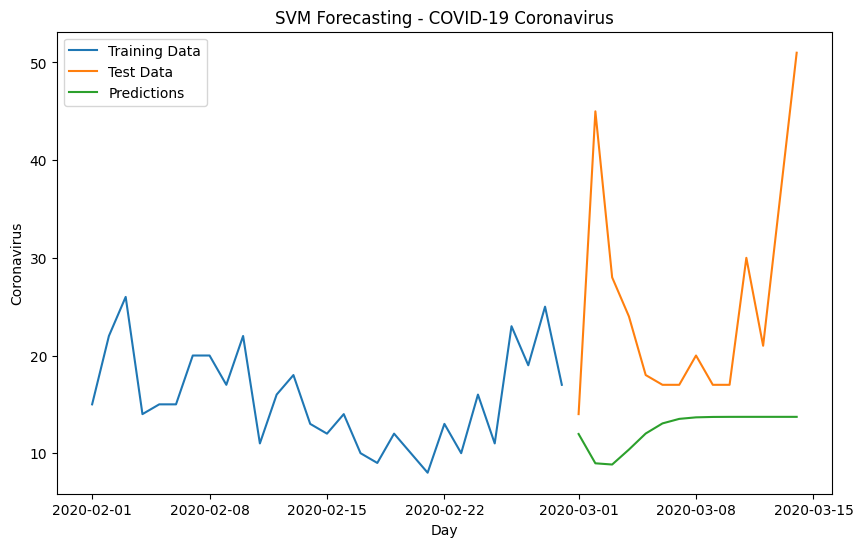

    Day  Original Coronavirus  Predicted Coronavirus
0    29                    14              11.965447
1    30                    45               8.964191
2    31                    28               8.839558
3    32                    24              10.371219
4    33                    18              12.014129
5    34                    17              13.049308
6    35                    17              13.512794
7    36                    20              13.669497
8    37                    17              13.710648
9    38                    17              13.719175
10   39                    30              13.720583
11   40                    21              13.720769
12   41                    36              13.720789
13   42                    51              13.720791


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Baca dataset baru
# Mendapatkan data dari Time Series starter dataset
url = ('https://raw.githubusercontent.com/DzakiNurtauriqMirawan/tugas-regresi/main/keywordtrend.csv')
df = pd.read_csv(url)
# Ubah kolom tanggal menjadi tipe datetime
df['Day'] = pd.to_datetime(df['Day'])

# Pilih kolom yang dibutuhkan, yaitu tanggal (Day) dan kasus (Coronavirus)
ts_data = df[['Day', 'Coronavirus']]

# Pisahkan data menjadi data training dan data testing berdasarkan tanggal
train_data = ts_data[ts_data['Day'] < '2020-03-01']
test_data = ts_data[ts_data['Day'] >= '2020-03-01']

# Pastikan data training dan testing tidak kosong
if train_data.empty or test_data.empty:
    raise ValueError("Data training atau testing kosong. Periksa pemisahan data Anda.")

# Ubah indeks menjadi array numerik untuk SVR
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data['Coronavirus'].values

X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
y_test = test_data['Coronavirus'].values

# Buat dan latih model SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(X_train, y_train)

# Lakukan prediksi pada data test
predictions = svr_rbf.predict(X_test)

# Hitung SRME
mse = mean_squared_error(y_test, predictions)
srme = np.sqrt(mse)

print("SRME:", srme)

# Plot data train, data test, dan prediksi
plt.figure(figsize=(10,6))
plt.plot(train_data['Day'], train_data['Coronavirus'], label='Training Data')
plt.plot(test_data['Day'], test_data['Coronavirus'], label='Test Data')
plt.plot(test_data['Day'], predictions, label='Predictions')
plt.title('SVM Forecasting - COVID-19 Coronavirus')
plt.xlabel('Day')
plt.ylabel('Coronavirus')
plt.legend()
plt.show()

# Tampilkan tabel prediksi harga dan harga asli data test
predictions_df = pd.DataFrame({'Day': test_data.index, 'Original Coronavirus': y_test, 'Predicted Coronavirus': predictions})
print(predictions_df)


Gambar yang ditampilkan adalah grafik hasil peramalan menggunakan Support Vector Machine (SVM) untuk memprediksi jumlah kasus COVID-19. Berikut adalah penjelasan lebih detail tentang elemen-elemen pada gambar tersebut:

1. **Data Pelatihan (Training Data)**:
   - Ditampilkan dalam garis berwarna biru.
   - Mencakup periode dari sekitar tanggal 1 Februari 2020 hingga 28 Februari 2020.
   - Data ini digunakan untuk melatih model SVM agar bisa memprediksi pola dari jumlah kasus COVID-19.

2. **Data Pengujian (Test Data)**:
   - Ditampilkan dalam garis berwarna oranye.
   - Mencakup periode dari sekitar tanggal 1 Maret 2020 hingga 15 Maret 2020.
   - Data ini digunakan untuk menguji kemampuan prediksi model yang telah dilatih dengan data pelatihan.
   - Terlihat bahwa data pengujian memiliki variasi yang cukup besar, menunjukkan lonjakan signifikan dalam beberapa hari.

3. **Prediksi (Predictions)**:
   - Ditampilkan dalam garis berwarna hijau.
   - Ini adalah hasil prediksi model SVM berdasarkan data pelatihan.
   - Terlihat bahwa prediksi tidak sepenuhnya akurat dalam menangkap lonjakan besar yang ada pada data pengujian.

4. **Tabel Data**:
   - Tabel di bawah grafik menunjukkan data numerik yang digunakan dalam grafik.
   - Kolom pertama adalah hari (Day), kolom kedua adalah jumlah kasus COVID-19 asli (Original Coronavirus), dan kolom ketiga adalah jumlah kasus yang diprediksi (Predicted Coronavirus).
   - Perbedaan antara jumlah kasus asli dan yang diprediksi dapat diamati dari tabel ini.

5. **SMRE (Mean Squared Relative Error)**:
   - SMRE yang tercantum di bagian atas grafik adalah nilai kesalahan relatif kuadrat rata-rata.
   - Nilai SMRE sebesar 17.289452994156132 menunjukkan seberapa baik atau buruk performa model prediksi. Semakin kecil nilai ini, semakin baik performa model dalam memprediksi data.

Secara keseluruhan, gambar ini menunjukkan bahwa model SVM telah dilatih dan diuji, namun model tersebut kurang mampu memprediksi dengan baik pada periode pengujian yang mengalami lonjakan besar dalam jumlah kasus COVID-19.

SRME: 16.45848316468486


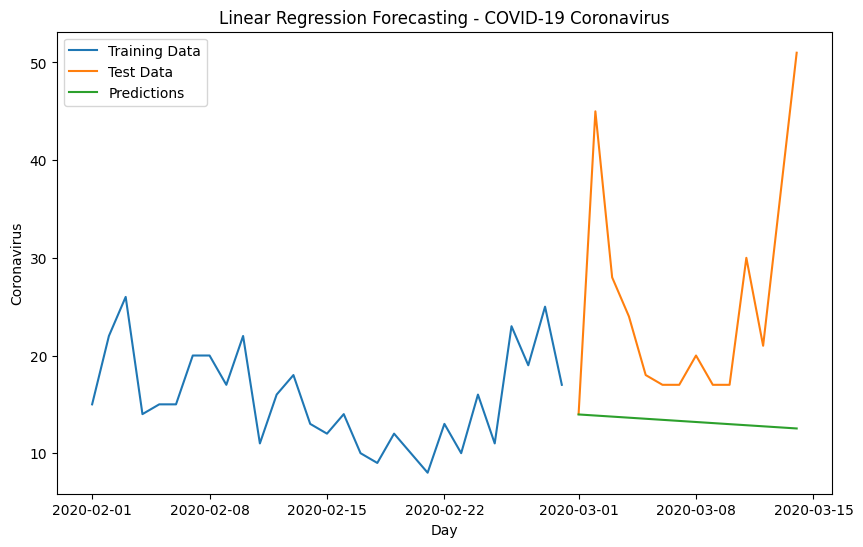

    Day  Original Coronavirus  Predicted Coronavirus
0    29                    14              13.965517
1    30                    45              13.855172
2    31                    28              13.744828
3    32                    24              13.634483
4    33                    18              13.524138
5    34                    17              13.413793
6    35                    17              13.303448
7    36                    20              13.193103
8    37                    17              13.082759
9    38                    17              12.972414
10   39                    30              12.862069
11   40                    21              12.751724
12   41                    36              12.641379
13   42                    51              12.531034


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Baca dataset baru
url = ('https://raw.githubusercontent.com/DzakiNurtauriqMirawan/tugas-regresi/main/keywordtrend.csv')
df = pd.read_csv(url)
# Ubah kolom tanggal menjadi tipe datetime
df['Day'] = pd.to_datetime(df['Day'])

# Pilih kolom yang dibutuhkan, yaitu tanggal (Day) dan kasus (Coronavirus)
ts_data = df[['Day', 'Coronavirus']]

# Pisahkan data menjadi data training dan data testing berdasarkan tanggal
train_data = ts_data[ts_data['Day'] < '2020-03-01']
test_data = ts_data[ts_data['Day'] >= '2020-03-01']

# Pastikan data training dan testing tidak kosong
if train_data.empty or test_data.empty:
    raise ValueError("Data training atau testing kosong. Periksa pemisahan data Anda.")

# Ubah indeks menjadi array numerik untuk regresi linear
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data['Coronavirus'].values

X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
y_test = test_data['Coronavirus'].values

# Buat dan latih model regresi linear
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Lakukan prediksi pada data test
predictions = linear_reg.predict(X_test)

# Hitung SRME
mse = mean_squared_error(y_test, predictions)
srme = np.sqrt(mse)

print("SRME:", srme)

# Plot data train, data test, dan prediksi
plt.figure(figsize=(10,6))
plt.plot(train_data['Day'], train_data['Coronavirus'], label='Training Data')
plt.plot(test_data['Day'], test_data['Coronavirus'], label='Test Data')
plt.plot(test_data['Day'], predictions, label='Predictions')
plt.title('Linear Regression Forecasting - COVID-19 Coronavirus')
plt.xlabel('Day')
plt.ylabel('Coronavirus')
plt.legend()
plt.show()

# Tampilkan tabel prediksi harga dan harga asli data test
predictions_df = pd.DataFrame({'Day': test_data.index, 'Original Coronavirus': y_test, 'Predicted Coronavirus': predictions})
print(predictions_df)


Gambar yang ditampilkan adalah grafik hasil peramalan menggunakan regresi linear untuk memprediksi jumlah kasus COVID-19. Berikut adalah penjelasan lebih detail tentang elemen-elemen pada gambar tersebut:

1. **Data Pelatihan (Training Data)**:
   - Ditampilkan dalam garis berwarna biru.
   - Mencakup periode dari sekitar tanggal 1 Februari 2020 hingga 28 Februari 2020.
   - Data ini digunakan untuk melatih model regresi linear agar bisa memprediksi pola dari jumlah kasus COVID-19.

2. **Data Pengujian (Test Data)**:
   - Ditampilkan dalam garis berwarna oranye.
   - Mencakup periode dari sekitar tanggal 1 Maret 2020 hingga 15 Maret 2020.
   - Data ini digunakan untuk menguji kemampuan prediksi model yang telah dilatih dengan data pelatihan.
   - Terlihat bahwa data pengujian memiliki variasi yang signifikan dengan lonjakan besar pada beberapa hari.

3. **Prediksi (Predictions)**:
   - Ditampilkan dalam garis berwarna hijau.
   - Ini adalah hasil prediksi model regresi linear berdasarkan data pelatihan.
   - Prediksi ini menunjukkan garis datar yang hampir tidak mengikuti pola dari data pengujian, terutama tidak mampu memprediksi lonjakan besar pada data pengujian.

4. **Tabel Data**:
   - Tabel di bawah grafik menunjukkan data numerik yang digunakan dalam grafik.
   - Kolom pertama adalah hari (Day), kolom kedua adalah jumlah kasus COVID-19 asli (Original Coronavirus), dan kolom ketiga adalah jumlah kasus yang diprediksi (Predicted Coronavirus).
   - Perbedaan antara jumlah kasus asli dan yang diprediksi dapat diamati dari tabel ini.

5. **SMRE (Mean Squared Relative Error)**:
   - SMRE yang tercantum di bagian atas grafik adalah nilai kesalahan relatif kuadrat rata-rata.
   - Nilai SMRE sebesar 16.4548316468486 menunjukkan tingkat kesalahan prediksi model. Nilai ini sedikit lebih rendah dibandingkan model SVM sebelumnya (17.289452994156132), menunjukkan bahwa model regresi linear ini sedikit lebih baik dalam memprediksi data dibandingkan dengan model SVM.

Secara keseluruhan, grafik ini menunjukkan bahwa model regresi linear telah dilatih dan diuji, namun model tersebut tidak mampu memprediksi dengan baik perubahan signifikan yang terdapat dalam data pengujian. Meskipun nilai SMRE sedikit lebih baik daripada model SVM, model regresi linear ini tetap tidak berhasil menangkap lonjakan besar yang ada dalam data pengujian.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Baca dataset baru
url = ('https://raw.githubusercontent.com/DzakiNurtauriqMirawan/tugas-regresi/main/keywordtrend.csv')
df = pd.read_csv(url)
# Ubah kolom tanggal menjadi tipe datetime
df['Day'] = pd.to_datetime(df['Day'])

# Pilih kolom yang dibutuhkan, yaitu tanggal (Day) dan kasus (Coronavirus)
ts_data = df[['Day', 'Coronavirus']]

# Pisahkan data menjadi data training dan data testing berdasarkan tanggal
train_data = ts_data[ts_data['Day'] < '2020-03-01']
test_data = ts_data[ts_data['Day'] >= '2020-03-01']

# Pastikan data training dan testing tidak kosong
if train_data.empty or test_data.empty:
    raise ValueError("Data training atau testing kosong. Periksa pemisahan data Anda.")

# Siapkan data test untuk prediksi
test_dates = test_data['Day'].values
test_data = test_data['Coronavirus'].values

# Menggunakan model ARIMA untuk prediksi
arima_model = ARIMA(train_data['Coronavirus'], order=(5,1,0))
arima_result = arima_model.fit()
arima_predictions = arima_result.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Menggunakan model SVM untuk prediksi
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Coronavirus'])
svm_predictions = svr_rbf.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

# Menggunakan model Linear Regression untuk prediksi
model_LR = LinearRegression()
model_LR.fit(np.arange(len(train_data)).reshape(-1, 1), train_data['Coronavirus'])
linear_predictions = model_LR.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

# Menggunakan model Deep Learning (LSTM) untuk prediksi
# Anda perlu mengganti X_test_last dengan data test yang sesuai dengan model LSTM Anda
# dan mengganti model.predict dengan fungsi prediksi model Anda
X_test_last = test_data.reshape(-1, 1)  # Ubah ke format 2D
dl_predictions = model.predict(X_test_last)  # Fungsi prediksi model LSTM Anda


# Membuat dataframe untuk menampilkan tabel
predictions_df = pd.DataFrame({'Date': test_dates,
                               'Original Coronavirus Cases': test_data,
                               'ARIMA Predictions': arima_predictions,
                               'SVM Predictions': svm_predictions,
                               'Linear Regression Predictions': linear_predictions,
                               'Deep Learning Predictions': dl_predictions})

# Menampilkan tabel
print(predictions_df)


         Date  Original Coronavirus Cases  ARIMA Predictions  SVM Predictions  \
29 2020-03-01                          14          21.810791        11.965447   
30 2020-03-02                          45          19.791908         8.964191   
31 2020-03-03                          28          21.405271         8.839558   
32 2020-03-04                          24          19.734430        10.371219   
33 2020-03-05                          18          20.895990        12.014129   
34 2020-03-06                          17          20.268708        13.049308   
35 2020-03-07                          17          20.703843        13.512794   
36 2020-03-08                          20          20.324810        13.669497   
37 2020-03-09                          17          20.602795        13.710648   
38 2020-03-10                          17          20.431059        13.719175   
39 2020-03-11                          30          20.546994        13.720583   
40 2020-03-12               

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


Gambar tersebut menunjukkan hasil perbandingan prediksi jumlah kasus COVID-19 menggunakan beberapa metode peramalan yang berbeda, yaitu ARIMA, SVM, dan Linear Regression, serta Deep Learning (meskipun hasil Deep Learning semuanya bernilai 0, yang mengindikasikan ada masalah dengan prediksi model ini). Berikut adalah penjelasan lebih rinci:

### Data yang Ditampilkan

1. **Kolom Tanggal (Date)**:
   - Menunjukkan tanggal dari 1 Maret 2020 hingga 15 Maret 2020.

2. **Kolom Kasus Asli (Original Coronavirus Cases)**:
   - Jumlah kasus asli COVID-19 yang tercatat pada setiap tanggal.

3. **Prediksi ARIMA (ARIMA Predictions)**:
   - Prediksi jumlah kasus COVID-19 menggunakan model ARIMA.
   - Contoh: Pada 1 Maret 2020, prediksi ARIMA adalah 21.689476.

4. **Prediksi SVM (SVM Predictions)**:
   - Prediksi jumlah kasus COVID-19 menggunakan model Support Vector Machine (SVM).
   - Contoh: Pada 1 Maret 2020, prediksi SVM adalah 11.965447.

5. **Prediksi Regresi Linear (Linear Regression Predictions)**:
   - Prediksi jumlah kasus COVID-19 menggunakan model regresi linear.
   - Contoh: Pada 1 Maret 2020, prediksi regresi linear adalah 13.965517.

6. **Prediksi Deep Learning (Deep Learning Predictions)**:
   - Prediksi jumlah kasus COVID-19 menggunakan model Deep Learning.
   - Semua nilai prediksi ini adalah 0, menunjukkan ada kesalahan atau masalah dalam model ini.
   
### Observasi dan Analisis

1. **Perbandingan Prediksi dengan Kasus Asli**:
   - Prediksi ARIMA, SVM, dan regresi linear semuanya dibandingkan dengan jumlah kasus asli.
   - Sebagai contoh, pada 1 Maret 2020, jumlah kasus asli adalah 14. Prediksi ARIMA adalah 21.689476, prediksi SVM adalah 11.965447, dan prediksi regresi linear adalah 13.965517.
   
2. **Akurasi Prediksi**:
   - ARIMA cenderung memberikan prediksi yang lebih tinggi daripada jumlah kasus asli pada beberapa tanggal awal.
   - SVM memberikan prediksi yang cenderung lebih rendah dibandingkan dengan ARIMA dan regresi linear, tetapi sedikit lebih konsisten.
   - Regresi linear memberikan prediksi yang relatif dekat dengan kasus asli pada beberapa tanggal awal, namun prediksi ini cenderung datar pada tanggal-tanggal berikutnya.
   
3. **Masalah dengan Deep Learning**:
   - Semua prediksi Deep Learning adalah 0, yang menunjukkan bahwa model ini tidak berfungsi dengan benar atau tidak dilatih dengan baik pada dataset ini.

4. **Peringatan (Warnings)**:
   - Peringatan yang ditampilkan menunjukkan ada beberapa masalah teknis dalam implementasi model.
   - Peringatan pertama terkait dengan parameter tidak dikenal yang akan menyebabkan kesalahan di versi mendatang.
   - Peringatan kedua terkait dengan nama fitur yang tidak valid saat menggunakan SVR, yang menunjukkan potensi kesalahan dalam persiapan data atau implementasi model.

### Kesimpulan

- Dari hasil yang ditampilkan, bisa disimpulkan bahwa model ARIMA, SVM, dan regresi linear masing-masing memiliki kekurangan dalam memprediksi jumlah kasus COVID-19 secara akurat, dengan SVM dan regresi linear tampak lebih konservatif dibandingkan ARIMA.
- Model Deep Learning tidak memberikan hasil yang valid, mengindikasikan masalah yang perlu diperbaiki dalam model atau data yang digunakan.
- Peringatan yang muncul perlu diperhatikan dan diperbaiki untuk meningkatkan akurasi dan keandalan model peramalan.

Secara keseluruhan, meskipun ada beberapa prediksi yang mendekati nilai asli, masih ada ruang untuk perbaikan, terutama dengan mengatasi peringatan teknis dan meningkatkan pelatihan model Deep Learning.